# Problem 1

设某一年龄组鱼的条数为$x(t), t\in[0,1]$，捕捞强度为$k$，累计捕捞量为$y(t), t\in[0,1]$。

$$\begin{aligned}&\frac{\mathrm{d}}{\mathrm{d}t} x(t) = (\ln(0.2)-k)x(t)\\\Rightarrow&x(t) = x(0)\mathrm{e}^{(\ln(0.2) - k)t}\\&y(t) =\int_0^t kx(\tau) \mathrm{d}\tau = \frac{kx(0)}{k - \ln(0.2)}(1 - \mathrm{e}^{(\ln(0.2) - k)t}) \end{aligned}$$

稳态条件：
- $x_1(0) = \frac{C_1n}{C_1+n},n=\frac12C_2x_3(\frac23)+C_2x_4(\frac23), C_1=1.22\times10^{11}, C_2=1.109\times10^5$
- $x_2(0) = x_1(1)$
- $x_3(0) = x_2(1)$
- $x_4(0) = x_3(1)+x_4(1)$ （假设四龄鱼下一年还是四龄鱼）

变化规律：
- $x_1(1) = 0.2x_1(0)$
- $x_2(1) = 0.2x_2(0)$
- $x_3(\frac23) = x_3(0)\mathrm{e}^{\frac23(\ln(0.2) - k_3)}$
- $x_3(1) = x_3(\frac23) \mathrm{e}^{\frac13\ln(0.2)}$
- $x_4(\frac23) = x_4(0)\mathrm{e}^{\frac23(\ln(0.2) - k_4)}$
- $x_4(1) = x_4(\frac23) \mathrm{e}^{\frac13\ln(0.2)}$
- $k_3 = 0.42k_4$

欲求：
$\max(17.86 y_3(\frac23) + 22.99 y_4(\frac23))$

In [154]:
from sympy import symbols, exp, log, solve

x10, x11, x20, x21, x30, x323, x31, x40, x423, x41 = symbols('x10, x11, x20, x21, x30, x323, x31, x40, x423, x41')
k3, k4 = symbols('k3, k4')

k3 = 0.42 * k4

x11 = 0.2 * x10
x20 = x11
x21 = 0.2 * x20
x30 = x21
x323 = x30 * exp(2/3 * (log(0.2) - k3))
x31 = x323 * exp(1/3 * log(0.2))

In [155]:
x423 = x40 * exp(2/3 * (log(0.2) - k4))
x41 = x423 * exp(1/3 * log(0.2))

E = x40 - x31 - x41
x40 = solve(E, x40)[0]

x423 = x40 * exp(2/3 * (log(0.2) - k4))
x41 = x423 * exp(1/3 * log(0.2))

In [156]:
C1 = 1.22e11
C2 = 1.316e5    # revision by Zero Weight

n = 1/2 * C2 * x323 + C2 * x423
E = C1 + n - C1 * n / x10
x10 = solve(E, x10)[0]

In [157]:
x11 = 0.2 * x10
x20 = x11
x21 = 0.2 * x20
x30 = x21
x323 = x30 * exp(2/3 * (log(0.2) - k3))
x31 = x323 * exp(1/3 * log(0.2))

x40 = x40.subs({'x10': x10})
x423 = x40 * exp(2/3 * (log(0.2) - k4))
x41 = x423 * exp(1/3 * log(0.2))

In [158]:
y3 = k3 * x30 / (k3 - log(0.2)) * (1 - exp(2/3 * (log(0.2) - k3)))
y4 = k4 * x40 / (k4 - log(0.2)) * (1 - exp(2/3 * (log(0.2) - k4)))
y = 17.86 * y3 + 22.99 * y4

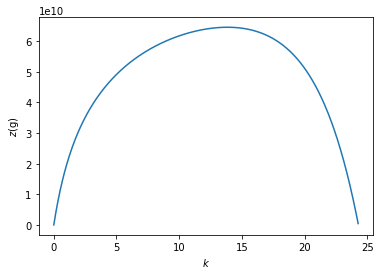

k: 13.83883883883884
y: 64539698154.108246


In [159]:
from sympy import lambdify
import numpy as np
from matplotlib import pyplot as plt

f = lambdify(k4, y)
k_space = np.linspace(0, 25, 1000)
y_space = f(k_space)
end = np.argmax(y_space < 0)
plt.plot(k_space[:end], y_space[:end])
plt.xlabel('$k$')
plt.ylabel('$z (\mathrm{g})$')
plt.show()

print('k: {}'.format(k_space[np.argmax(y_space)]))
print('y: {}'.format(np.max(y_space)))

# Problem 2

对于 $t\in\mathbb{N}$：

$$\begin{aligned}x_1(t+1) &= G_k(x_3(t),x_4(t))\\
x_2(t+1) &= 0.2x_1(t)\\
x_3(t+1) &= 0.2x_2(t)\\
x_4(t+1) &= F_k(x_3(t), x_4(t))
\end{aligned}$$

$F_k(x_3,x_4), G_k(x_3,x_4)$的定义见代码。


而第$t$年的收获量

$$y=17.86 y_3(t+\frac23) + 22.99 y_4(t+\frac23)$$

其中$y_3,y_4$参见之前的定义

定义「生产能力不受太大破坏」为每个年龄段的剩余鱼数都不少于饱和值的0.8，其中饱和值为

$$\begin{bmatrix}1\\0.2\\0.2^2\\\frac54\times0.2^3 \end{bmatrix}\times 1.22\times 10^{11}$$

In [153]:
x10, x20, x30, x40 = symbols('x10, x20, x30, x40')
x1, x2, x3, x4 = x10, x20, x30, x40

k41, k42, k43, k44, k45 = symbols('k41, k42, k43, k44, k45')
k4 = (k41, k42, k43, k44, k45)

F = lambda x3, x4, k4: 0.2 * exp(-2/3 * 0.42 * k4) * x3 + 0.2 * exp(-2/3 * k4) * x4
N = lambda x3, x4, k4: 0.5 * C2 * exp(2/3 * (log(0.2) - 0.42 * k4)) * x3 + C2 * exp(2/3 * (log(0.2) - k4)) * x4
G = lambda x3, x4, k4: C1 * N(x3, x4, k4) / (C1 + N(x3, x4, k4))

y = 0

for t in range(5):
    y3 = 0.42 * k4[t] * x3 / (0.42 * k4[t] - log(0.2)) * (1 - exp(2/3 * (log(0.2) - 0.42 * k4[t])))
    y4 = k4[t] * x4 / (k4[t] - log(0.2)) * (1 - exp(2/3 * (log(0.2) - k4[t])))
    y += (17.86 * y3 + 22.99 * y4)
    x1, x2, x3, x4 = G(x3, x4, k4[t]), 0.2 * x1, 0.2 * x2, F(x3, x4, k4[t])

In [154]:
values = {
    'x10': 122e9,
    'x20': 29.7e9,
    'x30': 10.1e9,
    'x40': 3.29e9
}

x1 = x1.subs(values)
x2 = x2.subs(values)
x3 = x3.subs(values)
x4 = x4.subs(values)
y = y.subs(values)

In [155]:
def get_sigmoid(k, x0):
    return lambda x: 1 / (1 + exp(-k * (x - x0)))

k = 100
x0 = 0.8
sigmoid = get_sigmoid(k, x0)

sat = 1.22e11 * np.array([1, 0.2, 0.2 ** 2, 5/4 * 0.2 ** 3])

M = [1e3, 1e3, 1e3, 1e3]
penalty = sum([M[i] * (1 - sigmoid(x / sat[i])) for i, x in enumerate((x1, x2, x3, x4))])
goal = - (1e-9 * y) + penalty

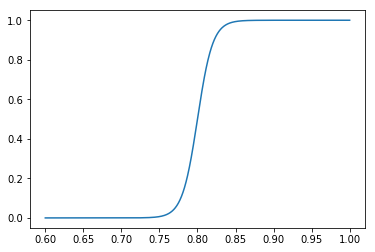

In [156]:
x_space = np.linspace(0.6, 1, 1000)
y_space = 1 / (1 + np.exp(-k * (x_space - x0)))
plt.plot(x_space, y_space)
plt.show()

In [157]:
grad = [goal.diff(p) for p in k4]

In [163]:
def random_init():
    return 10 + 2 * np.random.randn()

def gradient_descent(verbose=False):
    # initial values
    values = {
        'k41': random_init(),
        'k42': random_init(),
        'k43': random_init(),
        'k44': random_init(),
        'k45': random_init(),
    }

    alpha = 3e-1
    eps = 1e-6

    goal_value = 1e20

    # repeat until convergence
    while True:
        goal_value_new = goal.subs(values).evalf()
        if goal_value - goal_value_new < eps:
            print(goal_value_new)
            break
        grad_value = [g.subs(values).evalf() for g in grad]
        for i, k in enumerate(('k41', 'k42', 'k43', 'k44', 'k45')):
            values[k] -= alpha * grad_value[i]
        goal_value = goal_value_new
        if verbose:
            print(goal_value, values)

    return values
    
values = gradient_descent(verbose=True)

547.649361472425 {'k41': 9.12232815920300, 'k42': 13.3459823889608, 'k43': 10.7083258999892, 'k44': 10.8215259970527, 'k45': 15.0653337830383}
532.585855963525 {'k41': 10.6150843386235, 'k42': 13.5308622310246, 'k43': 11.1863746024855, 'k44': 11.2872907282315, 'k45': 15.3552806813398}
524.174591963361 {'k41': 11.7869200348690, 'k42': 13.6907506377741, 'k43': 11.6351923657977, 'k44': 11.7236744568908, 'k45': 15.6264593614171}
518.426108676173 {'k41': 12.7536427247786, 'k42': 13.8292014793033, 'k43': 12.0588221378522, 'k44': 12.1344401820913, 'k45': 15.8716896523024}
514.181163937706 {'k41': 13.5708253837697, 'k42': 13.9483273791347, 'k43': 12.4604821216113, 'k44': 12.5226153424981, 'k45': 16.0767423598608}
510.937917572706 {'k41': 14.2702085259828, 'k42': 14.0494419739074, 'k43': 12.8427784835809, 'k44': 12.8906939170562, 'k45': 16.2212773317004}
508.419845155731 {'k41': 14.8721881599833, 'k42': 14.1340918542856, 'k43': 13.2078504141565, 'k44': 13.2407696887116, 'k45': 16.2940527733463}

In [165]:
print(values)
y_value = y.subs(values)
ratio = np.array([x.subs(values) for x in (x1, x2, x3, x4)]) / sat
print(y_value)
print(ratio)

{'k41': 18.1828154144991, 'k42': 14.6855156859728, 'k43': 16.5065321396336, 'k44': 16.1347610016157, 'k45': 16.2860536997393}
502916609887.472
[0.881558692657161 0.882382800958683 0.881799986868496 0.00784973149026838]
